<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

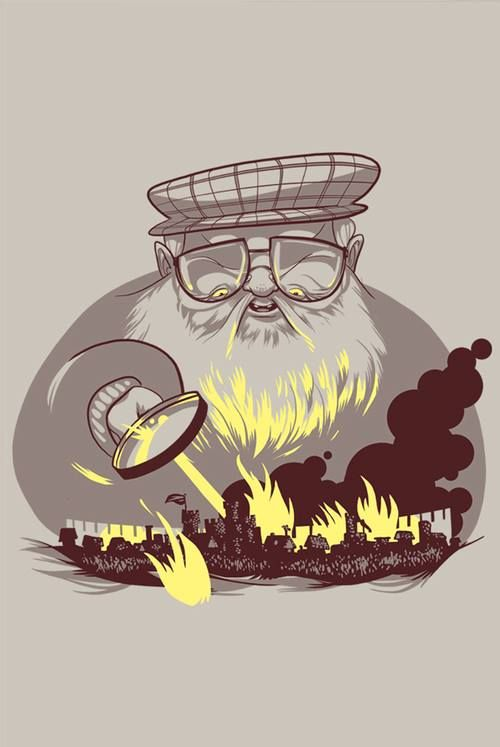

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
# Загружаем данные датасета в переменную
df = pd.read_csv('/content/game_of_thrones_train.csv', index_col="S.No")
df_submission = pd.read_csv('/content/game_of_thrones_test.csv', index_col="S.No")
df['isAlive'].sample(10)

,isAlive
S.No,
1393,1
1480,0
546,1
1085,1
1412,1
1088,0
1513,0
679,1
153,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
# Удаляем ненужные признаки с NaN значениями
df.drop(columns=['name', 'title', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age'], inplace=True)
df.sample(10)

,male,culture,house,book1,book2,book3,book4,book5,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,
596,1,NaN,House Plumm,0,0,1,1,0,0,0.046823,1
1067,1,Astapori,Good Masters,0,0,1,0,0,0,0.030100,0
165,1,NaN,Night's Watch,0,0,1,0,0,0,0.020067,0
1346,0,NaN,House Florent,0,1,1,1,0,0,0.070234,1
1533,1,Ghiscari,House of Loraq,0,0,0,0,1,0,0.076923,0
108,0,NaN,House Tarth,0,0,0,1,0,0,0.000000,1
1413,1,NaN,House Lannister,1,1,1,1,1,0,0.133779,0
331,0,Valyrian,House Targaryen,0,0,0,0,0,0,0.043478,1
235,1,NaN,Brave Companions,0,1,1,0,0,0,0.023411,0


In [ ]:
# Заполняем NaN-данные для признака 'house'
df['house'] = df['house'].fillna(value = 'Unknown')

# Переведем данные из 'house' в 'culture'
houses_to_cult = {
    'North': ['House Bolton', 'House Flint', "House Flint of Widow's Watch", 'House Manderly', 'House Poole', 'House Stark', "Night's Watch"],

    'Westeros': ["Alchemists' Guild", 'Brotherhood Without Banners', 'Citadel', "City Watch of King's Landing", 'Faith of the Seven', 'Kingsguard', 'Maesters', 'Peach', 'The Citadel'],

    'Ancient': ['Blacks', 'Kingswood Brotherhood', 'Queensguard', 'Sea watch'],

    'Essos': ['Brave Companions', 'Company of the Cat', 'Faceless Men', 'Happy Port', 'Second Sons', 'Windblown'],

    'Free Folk': ['wildling']
}

houses_westeros = set(pd.Series.to_list(df[df['culture'].isna()]['house']))
houses_to_delete = ['Unknown']
for house in houses_to_cult:
  houses_to_delete += houses_to_cult[house]

for house in houses_to_delete:
  houses_westeros.remove(house)

houses_to_cult['Westeros'] += houses_westeros

for houses in houses_to_cult:
  for house in houses_to_cult[houses]:
    df.loc[df['house'] == house, 'culture'] = houses

# Удаляем признак 'house'
df.drop(columns=['house'], inplace=True)

# Заполняем NaN-данные для признака 'culture'
df['culture'] = df['culture'].fillna(value = 'Unknown')

In [ ]:
# df['books'] = df['book1'] + df['book2'] + df['book3'] + df['book4'] + df['book5']
# for index, value in enumerate(df['books']):
#   if value > 0:
#     df.loc[index+1, 'books'] = 1
# df.sample(10)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# Замена признака 'popularity' на 'isPopular'
pLimit = df['popularity'].median()
print(pLimit)
df['isPopular'] = [1 if x >= pLimit else 0 for x in df['popularity']]

# Замена признака 'numDeadRelations' на 'boolDeadRelations'
df['boolDeadRelations'] = [1 if x >= 1 else 0 for x in df['numDeadRelations']]

# Удаляем признаки 'popularity' и 'numDeadRelations'
df.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

df.sample(10)

0.0234113712374581


,male,culture,book1,book2,book3,book4,book5,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,
138,0,Braavosi,0,0,0,0,0,1,0,0
885,0,Westeros,0,1,1,1,0,1,1,0
1296,1,Westeros,0,0,0,0,0,0,1,0
987,0,Westeros,0,1,1,1,1,0,0,0
966,0,Westeros,0,0,0,1,1,1,1,0
398,0,North,0,1,0,0,0,1,0,0
594,1,North,0,1,0,0,0,1,0,0
674,0,Summer Isles,0,0,0,1,0,1,0,0
1133,0,Westeros,0,0,0,1,1,1,1,0


In [ ]:
# Объединение схожих значений признака 'culture'
cult = {
    'Ancient': ['andal', 'andals', 'rhoynar', 'first men', 'valyrian'],
    'Essos': ["asshai'i", 'asshai', 'astapor', 'dothraki', 'ghiscari', 'ghiscaricari', 'ibbenese', 'ghis', 'lhazareen', 'lhazarene', 'naathi', 'summer islands', 'summer islander', 'summer isles'],
    'Free Cities': ['astapori', 'braavosi', 'braavos', 'lysene', 'lyseni', 'meereen', 'meereenese', 'myrish', 'norvos', 'norvoshi', 'pentoshi', 'qarth','qartheen', 'qohor', 'tyroshi'],
    'Free Folk': ['wildling', 'wildlings', 'free folk'],
    'North': ['the north', 'northmen', 'northern mountain clans'],
    'Westeros': ['dornishmen', 'dorne', 'dornish', 'ironborn', 'ironmen', 'the reach', 'reach', 'reachmen', 'stormlands', 'stormlander', 'riverlands', 'rivermen', 'sistermen', \
                'vale', 'vale mountain clans', 'valemen', 'westermen', 'westerman', 'westerlands', 'westeros', 'westerosi', 'crannogmen']
}

for cult_name in cult:
  df['culture'] = [cult_name if x.lower() in cult[cult_name] else x for x in df['culture']]

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

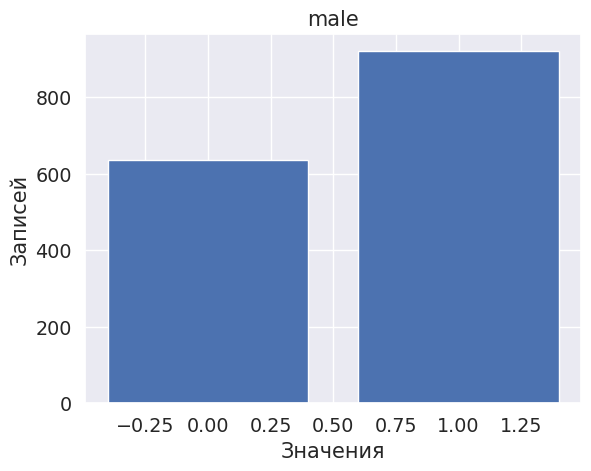

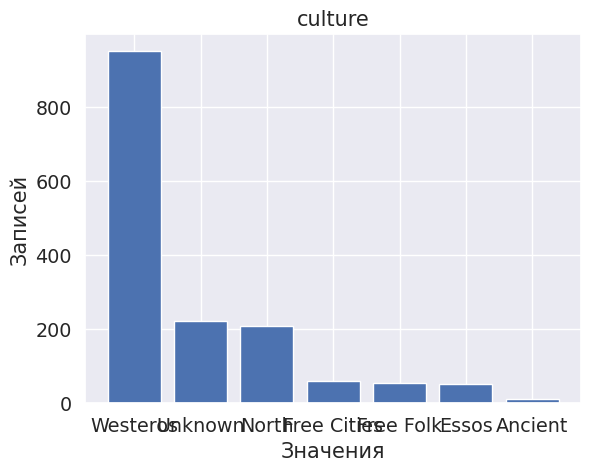

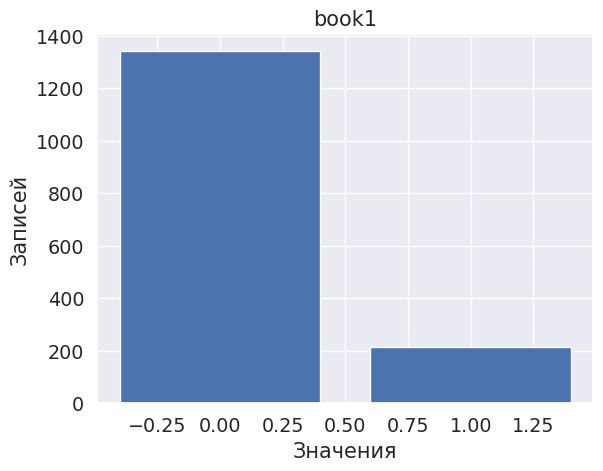

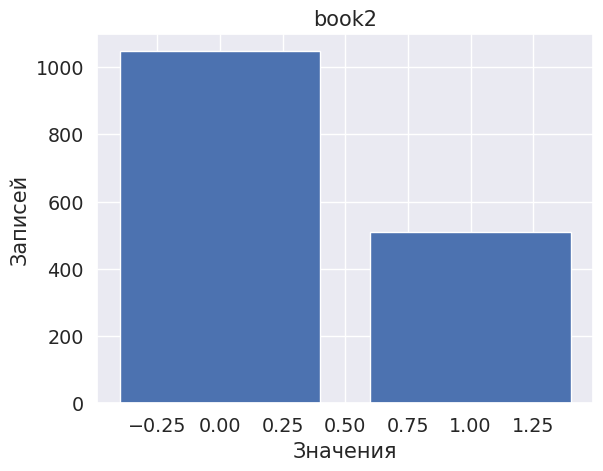

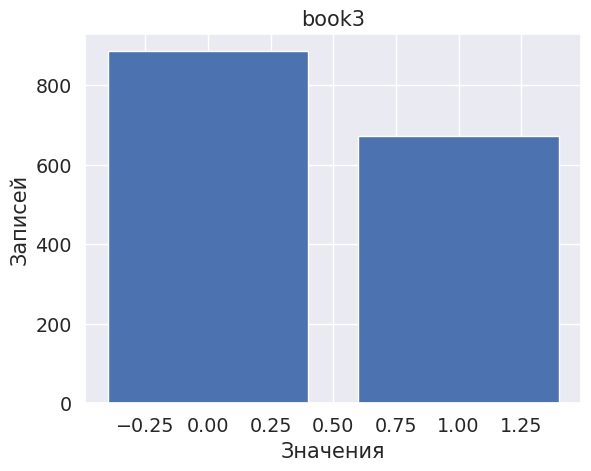

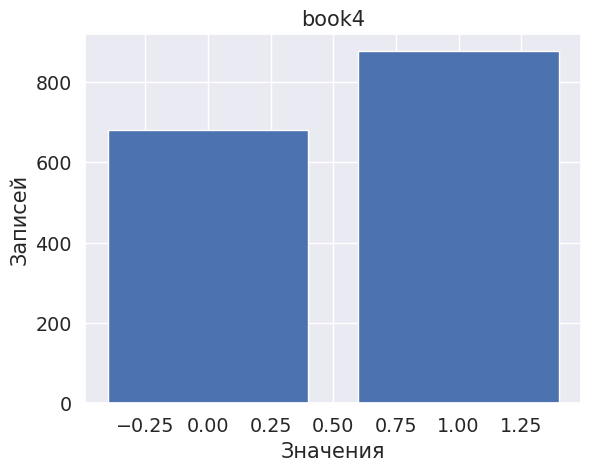

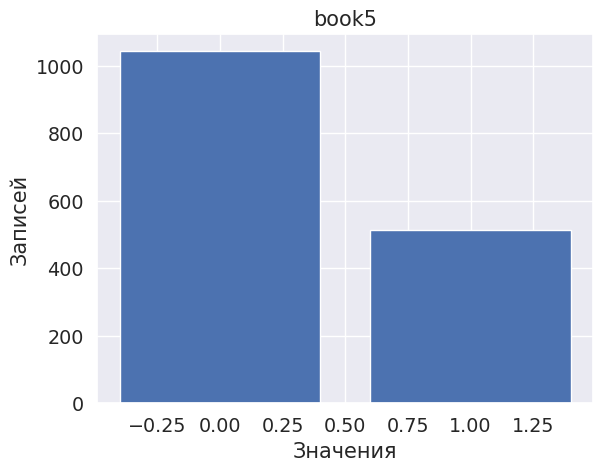

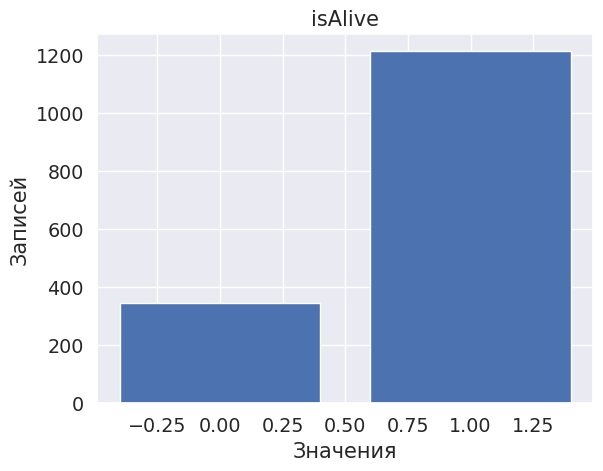

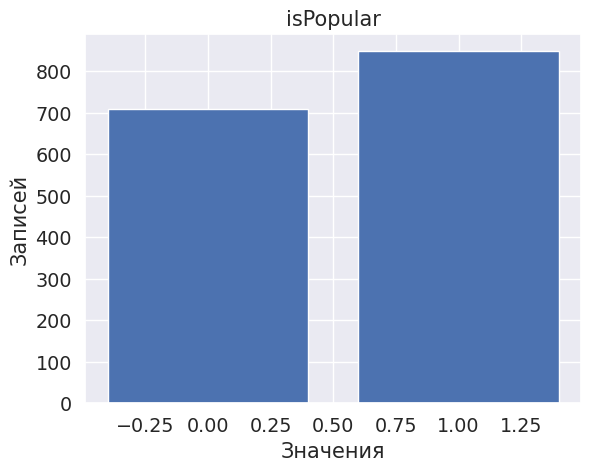

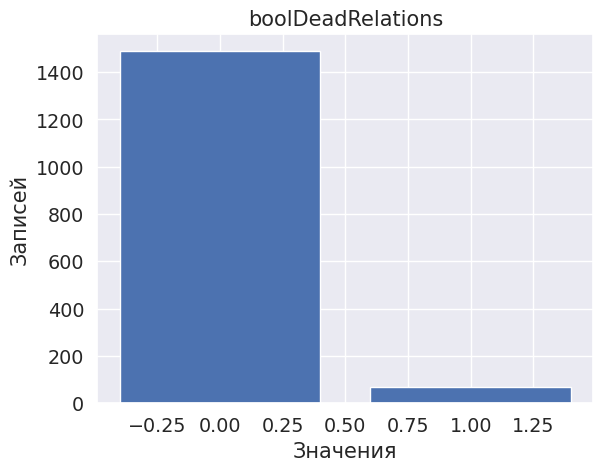

In [ ]:
# Создадим графики для визуального анализа данных
for column in df:
  df_visual = df[column].value_counts()
  plt.bar(df_visual.index, df_visual.values)
  plt.xlabel('Значения')
  plt.ylabel('Записей')
  plt.title(column)
  plt.show()

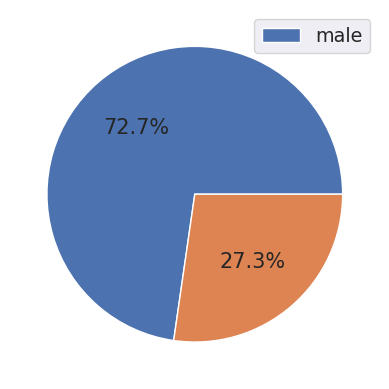

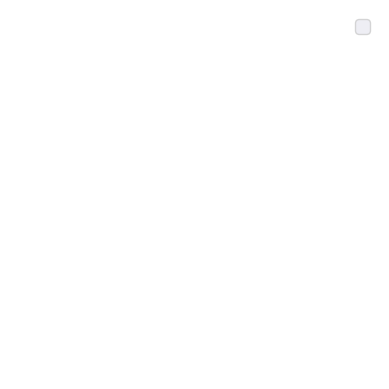

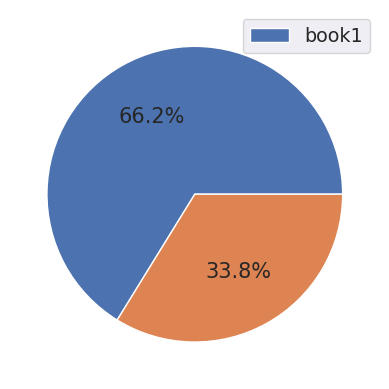

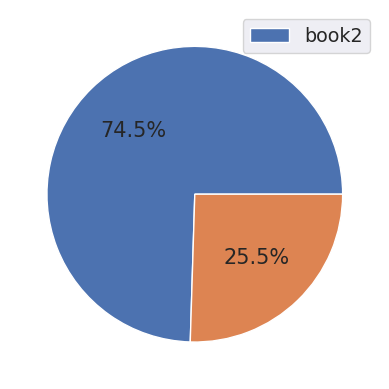

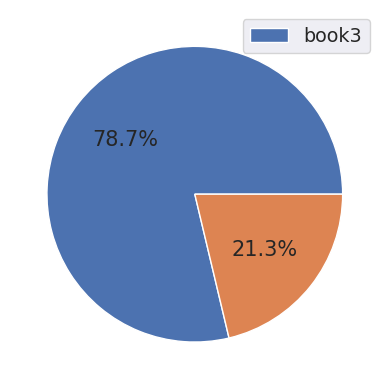

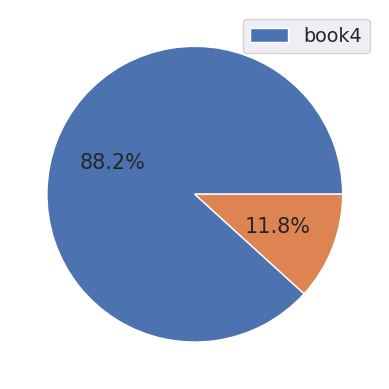

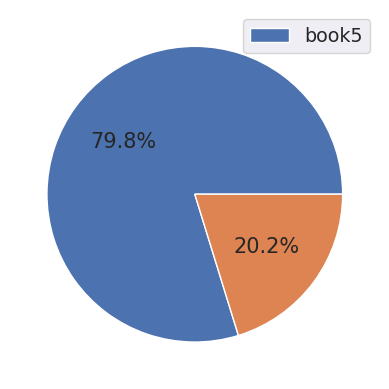

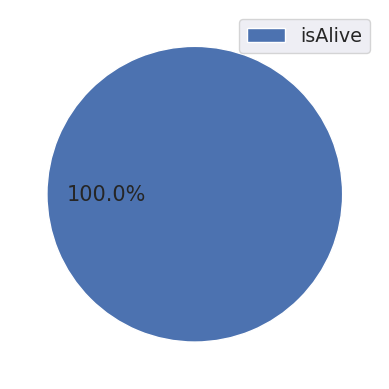

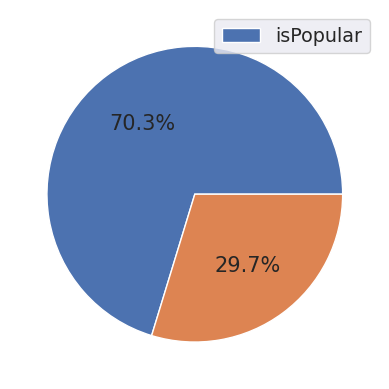

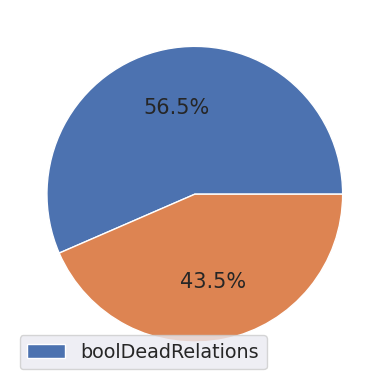

In [ ]:
# Готовим данные для графика
for column in df:
  data = df[df[column] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
  plt.pie(data, autopct='%1.1f%%')

  plt.legend([column])

  plt.show()

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

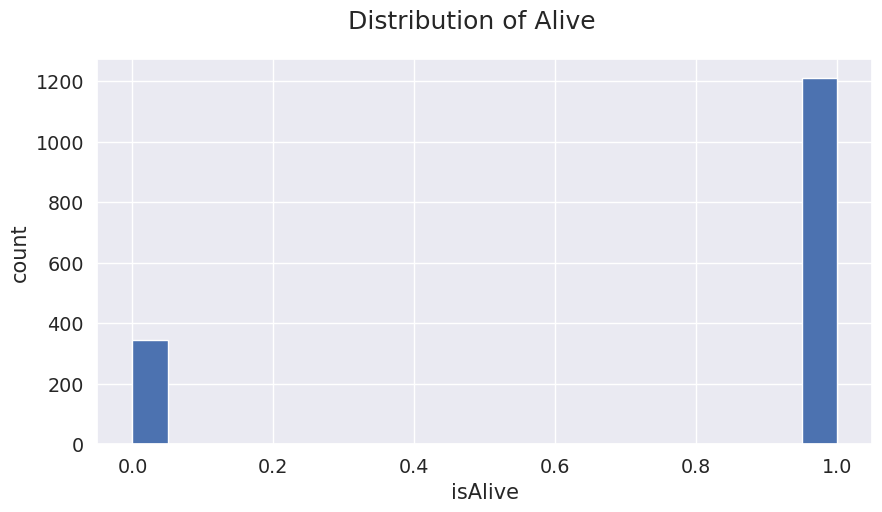

In [ ]:
# Целевой признак 'isAlive' является категориальным и несбалансированным
plt.figure(figsize = (10, 5))

df['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of Alive')
plt.show()

In [ ]:
# Для балансировки целевого признака выделяем живых и мертвых в отдельные датафреймы
df_alive = df[df['isAlive'] == 1].copy()
df_dead = df[df['isAlive'] == 0].copy()

# Перемешиваем датафрейм и оставляем только половину
df_alive = df_alive.sample(frac=1)
df_alive_half = df_alive.iloc[:600]

# Объединяем датафреймы живых и мертвых
df = pd.concat([df_dead, df_alive_half])
df = df.sample(frac=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 1506 to 1100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   male               945 non-null    int64 
 1   culture            945 non-null    object
 2   book1              945 non-null    int64 
 3   book2              945 non-null    int64 
 4   book3              945 non-null    int64 
 5   book4              945 non-null    int64 
 6   book5              945 non-null    int64 
 7   isAlive            945 non-null    int64 
 8   isPopular          945 non-null    int64 
 9   boolDeadRelations  945 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 81.2+ KB


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# Преобразуем категориальный признак 'culture' с помощью on-hot-encoder
categorical_columns = ['culture']
categorical_features = df[categorical_columns]
categorical_features.columns
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)

In [ ]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df = df_encoded
df

,male,book1,book2,book3,book4,book5,isAlive,isPopular,boolDeadRelations,culture_Ancient,culture_Essos,culture_Free Cities,culture_Free Folk,culture_North,culture_Unknown,culture_Westeros
S.No,,,,,,,,,,,,,,,,
1506,1,1,1,1,1,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
425,1,0,0,0,1,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
273,0,1,1,1,1,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1416,1,0,1,1,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
914,1,0,0,1,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1,1,1,1,1,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
880,1,0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1539,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


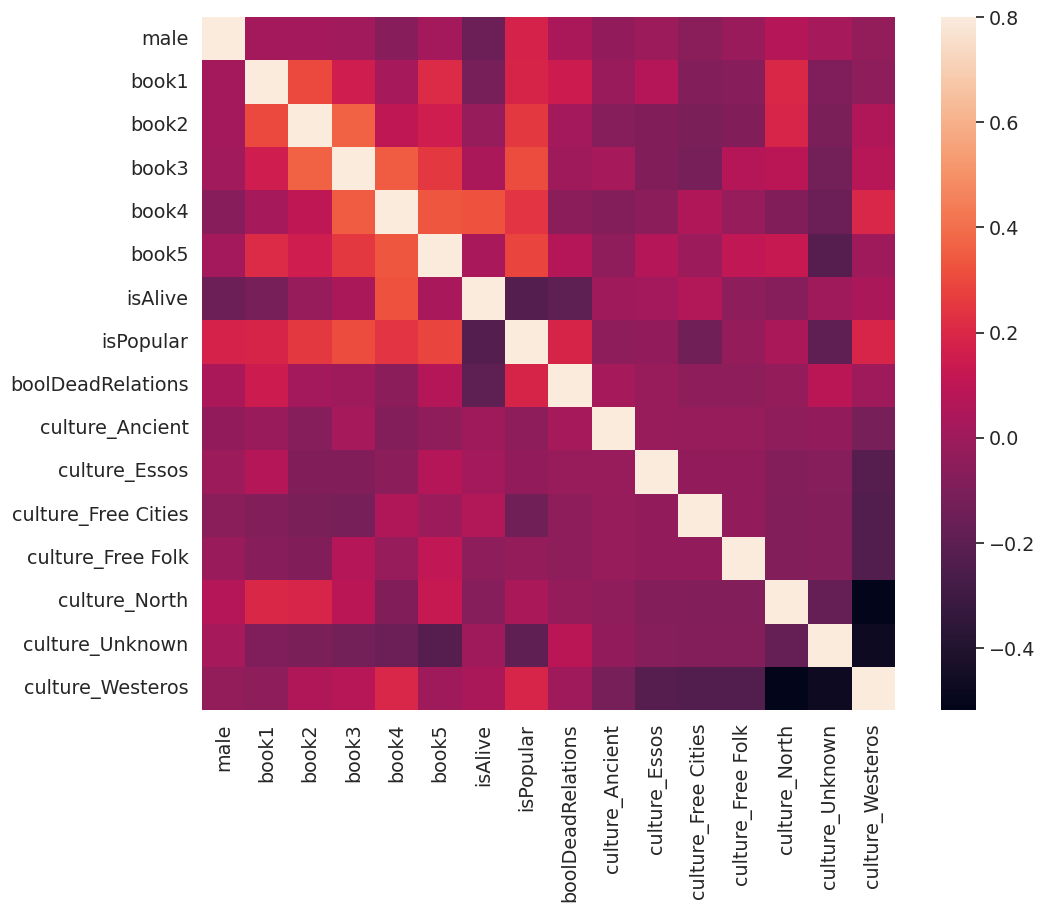

In [ ]:
# Построим heat-map для анализа корреляции признаков
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

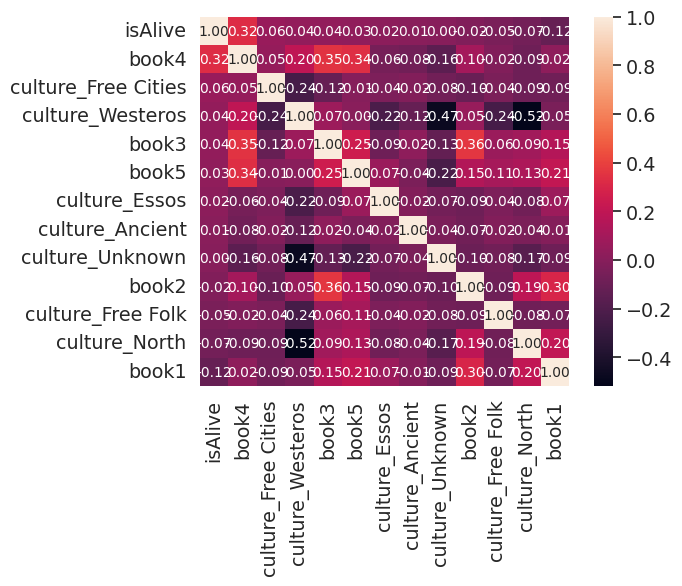

In [ ]:
# Посмотрим влияние признаков на целевую переменную
k = 13 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
# Разделим данные на признаки и целевую переменную
X = df.drop(columns=['isAlive']).values
y = df['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разделяем датасет на train и test части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7708


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_boost_clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

kernel = 1.0 * RBF(1.0)
gaussian_process_clf  = GaussianProcessClassifier(kernel=kernel, random_state=0)

gaussian_naive_bayes = GaussianNB()

k_neighbours_clf = KNeighborsClassifier(n_neighbors=3)

svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

decision_tree_clf = DecisionTreeClassifier(random_state=0)

clf_list = [ada_boost_clf, gaussian_process_clf, gaussian_naive_bayes, k_neighbours_clf, svc_clf, decision_tree_clf]

# Шаг 2. обучение модели
for clf in clf_list:
  clf.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных

for clf in clf_list:
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7708
Accuracy : 0.7500
Accuracy : 0.5833
Accuracy : 0.7083
Accuracy : 0.7708
Accuracy : 0.7083


In [ ]:
parameters = {'n_estimators': [*range(50, 100, 10)],
              'learning_rate': [*range(1, 10, 1)]}
ada_clf = GridSearchCV(AdaBoostClassifier(algorithm="SAMME"), parameters, scoring='accuracy', cv=5)
ada_clf.fit(X_train, y_train)
print(ada_clf.best_score_)

0.7469522036002483


In [ ]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'min_samples_split': [*range(2, 10, 1)]}
dt_grid_clf = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, scoring='accuracy', cv=10)
dt_grid_clf.fit(X_train, y_train)
print(dt_grid_clf.best_score_)

0.7625717852684145


In [ ]:
parameters = {'max_iter_predict': [*range(100, 200, 10)]}

gaussian_process_grid_clf = GridSearchCV(GaussianProcessClassifier(random_state=0), parameters, scoring='accuracy', cv=10)
gaussian_process_grid_clf.fit(X_train, y_train)
print(gaussian_process_grid_clf.best_score_)

0.7447690387016229


In [ ]:
parameters = {'n_neighbors': [*range(3, 20, 1)],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [*range(20, 50, 5)],
              'p': [1,2]}

k_neighbours_grid = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy', cv=10)
k_neighbours_grid.fit(X_train, y_train)
print(k_neighbours_grid.best_score_)

0.7324719101123596


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7292


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных и оценка предсказания по метрике accuracy
for clf in clf_list:
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy : %.4f" % accuracy)


Accuracy : 0.7292
Accuracy : 0.7292
Accuracy : 0.6042
Accuracy : 0.6458
Accuracy : 0.7083
Accuracy : 0.7500


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
df_submission = pd.read_csv('/content/game_of_thrones_test.csv', index_col="S.No")

In [ ]:
df_submission.drop(columns=['name', 'title', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age'], inplace=True)

for houses in houses_to_cult:
  for house in houses_to_cult[houses]:
    df_submission.loc[df_submission['house'] == house, 'culture'] = houses

print(pLimit)
df_submission['isPopular'] = [1 if x >= pLimit else 0 for x in df_submission['popularity']]

# Замена признака 'numDeadRelations' на 'boolDeadRelations'
df_submission['boolDeadRelations'] = [1 if x >= 1 else 0 for x in df_submission['numDeadRelations']]

# Удаляем признаки 'popularity' и 'numDeadRelations'
df_submission.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

df_submission['culture'] = df_submission['culture'].fillna(value = 'Unknown')

# Замена признака 'culture'
for cult_name in cult:
  df_submission['culture'] = [cult_name if x.lower() in cult[cult_name] else x for x in df_submission['culture']]

df_submission.drop(columns=['house'], inplace=True)

0.0234113712374581


In [ ]:
categorical_columns = ['culture']
categorical_features = df_submission[categorical_columns]
categorical_features.columns
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_submission[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df_submission.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_submission, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_submission = df_encoded

In [ ]:
X_submission = df_submission.values
y_submission = dt_grid_clf.predict(X_submission)
submission['isAlive'] = y_submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)